### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

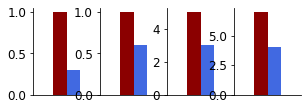

In [28]:
warmcol = 'darkred'; ozcol = 'royalblue'; tw = 1; marg = 1.5
windWarm = 1; windOz = 0.3
sstWarm = 1; sstOz = 0.6
otWarm = 7; otOz = 4
mldWarm = 5; mldOz = 3

fact = 0.4
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].bar(1,windWarm, color = warmcol, width = tw)
axs[0].bar(2,windOz, color = ozcol, width = tw)
axs[1].bar(1,sstWarm, color = warmcol, width = tw)
axs[1].bar(2,sstOz, color = ozcol, width = tw)
axs[2].bar(1,mldWarm, color = warmcol, width = tw)
axs[2].bar(2,mldOz, color = ozcol, width = tw)
axs[3].bar(1,otWarm, color = warmcol, width = tw)
axs[3].bar(2,otOz, color = ozcol, width = tw)


# axs[0].spines['bottom'].set_visible(False)
# axs[0].spines['left'].set_visible(False)


for i in range(0,4):
    axs[i].set_xlim([1-(tw/2)-marg,2+(tw/2)+marg])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xticks([])
    
plt.subplots_adjust(hspace = 0.0, wspace = 0.0)

AttributeError: 'Axes' object has no attribute 'subgridspec'

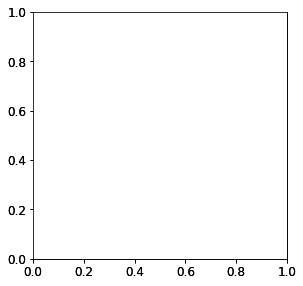

In [29]:
import matplotlib.pyplot as plt

# Create the main figure
fig = plt.figure(figsize=(10, 10))

# Create 4 primary subplots in the main figure
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1)

    # Create an inner grid for nested subplots
    inner_grid = ax.inset_axes([0, 0, 1, 1]).subgridspec(1, 3)

    # Create 3 nested subplots in each primary subplot
    for j in range(3):
        inner_ax = fig.add_subplot(inner_grid[0, j])
        inner_ax.plot()  # Add your plot here
        inner_ax.set_xticks([])  # Optional: remove x-ticks
        inner_ax.set_yticks([])  # Optional: remove y-ticks

# Adjust the layout
plt.tight_layout()
plt.show()

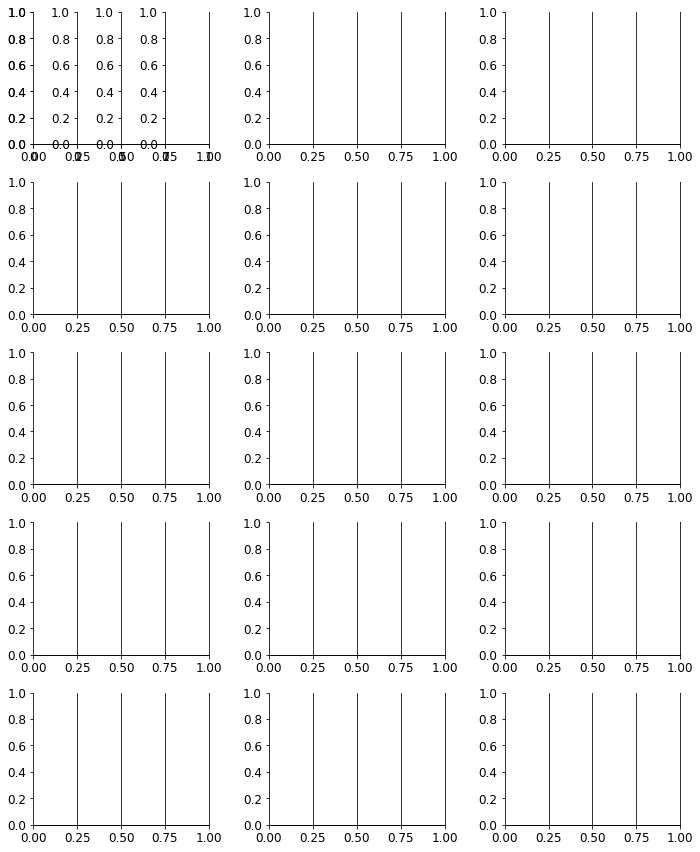

In [49]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the main figure
fig = plt.figure(figsize=(10, 12))

# Define GridSpec for the 4 main subplots
outer_grid = gridspec.GridSpec(5, 3, fig)

# Loop to create each of the 4 main subplots
for i in range(15):
    # Create a subplot in the outer grid
    outer_ax = plt.Subplot(fig, outer_grid[i])
    fig.add_subplot(outer_ax)

#     # Define GridSpec for the 3 nested subplots inside the current main subplot
    #inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i])
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_grid[i], wspace=0.0)

    #inner_grid.subplots_adjust(wspace=0.0)
    
#     axs[0].bar(1,windWarm, color = warmcol, width = tw)
#     axs[0].bar(2,windOz, color = ozcol, width = tw)
#     axs[1].bar(1,sstWarm, color = warmcol, width = tw)
#     axs[1].bar(2,sstOz, color = ozcol, width = tw)
#     axs[2].bar(1,mldWarm, color = warmcol, width = tw)
#     axs[2].bar(2,mldOz, color = ozcol, width = tw)
#     axs[3].bar(1,otWarm, color = warmcol, width = tw)
#     axs[3].bar(2,otOz, color = ozcol, width = tw)
#     # Loop to create each of the 3 nested subplots
    for j in range(4):
        # Create a subplot in the inner grid
        inner_ax = plt.Subplot(fig, inner_grid[j])
        fig.add_subplot(inner_ax)
        inner_ax.spines['top'].set_visible(False)
        inner_ax.spines['right'].set_visible(False)
        
    
        if i>0:
            inner_ax.set_yticks([])
            inner_ax.set_xticks([])
        # Plot your data here
        # Example: inner_ax.plot([1, 2, 3], [1, 2, 3])

        # Optional: Customize inner_ax (e.g., set labels, titles, etc.)

    # Optional: Customize outer_ax (e.g., set titles)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
savenam = 'test2.nc'
data_vars = {'trend':(['period', 'season', 'quantity', 'forcing'], vomecrty.values,
{'units': '/yr',
'long_name':'Surface ocean pCO2'}),
}
# define coordinates
coords = {'time_counter': (['time_counter'], time_counter),
        'time_centered': (['time_centered'], time_centered),
'nav_lat': (['y','x'], nav_lat),
'nav_lon': (['y','x'], nav_lon),
'depthv': (['depthv'], depthv)}
# define global attributes
attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
'desc': 'yearly medusa files, saving only variables of interest'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
ds.to_netcdf(savenam)